In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [2]:
CWD = os.getcwd()

In [3]:
aapl_csv_path = os.path.join(CWD, 'AAPL.csv')
df = pd.read_csv(aapl_csv_path)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400


In [4]:
df['Date'] = pd.to_datetime(df['Date'])
df['YearMonth'] = df['Date'].dt.to_period('M')
# For each month, find the high, low, open, and close values
df['MonthHigh'] = df.groupby('YearMonth')['High'].transform('max')
df['MonthLow'] = df.groupby('YearMonth')['Low'].transform('min')
df['MonthOpen'] = df.groupby('YearMonth')['Open'].transform('first')
df['MonthClose'] = df.groupby('YearMonth')['Close'].transform('last')
df

,Date,Open,High,Low,Close,Adj Close,Volume,YearMonth,MonthHigh,MonthLow,MonthOpen,MonthClose
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,1980-12,0.645089,0.450893,0.513393,0.609375
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,1980-12,0.645089,0.450893,0.513393,0.609375
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,1980-12,0.645089,0.450893,0.513393,0.609375
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,1980-12,0.645089,0.450893,0.513393,0.609375
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,1980-12,0.645089,0.450893,0.513393,0.609375
...,...,...,...,...,...,...,...,...,...,...,...,...
9904,2020-03-26,246.520004,258.679993,246.360001,258.440002,258.440002,63021800,2020-03,304.000000,212.610001,282.279999,254.289993
9905,2020-03-27,252.750000,255.869995,247.050003,247.740005,247.740005,51054200,2020-03,304.000000,212.610001,282.279999,254.289993
9906,2020-03-30,250.740005,255.520004,249.399994,254.809998,254.809998,41994100,2020-03,304.000000,212.610001,282.279999,254.289993
9907,2020-03-31,255.600006,262.489990,252.000000,254.289993,254.289993,49250500,2020-03,304.000000,212.610001,282.279999,254.289993


In [5]:
# Calculate EMA for Close, Open, High, Low with different periods (e.g., 12, 26, 50)
df['EMA_12_Close'] = df['Close'].ewm(span=12, adjust=False).mean()
df['EMA_26_Close'] = df['Close'].ewm(span=26, adjust=False).mean()
df['EMA_50_Close'] = df['Close'].ewm(span=50, adjust=False).mean()

# df['EMA_12_Open'] = df['Open'].ewm(span=12, adjust=False).mean()
# df['EMA_26_Open'] = df['Open'].ewm(span=26, adjust=False).mean()
# df['EMA_50_Open'] = df['Open'].ewm(span=50, adjust=False).mean()

# df['EMA_12_High'] = df['High'].ewm(span=12, adjust=False).mean()
# df['EMA_26_High'] = df['High'].ewm(span=26, adjust=False).mean()
# df['EMA_50_High'] = df['High'].ewm(span=50, adjust=False).mean()

# df['EMA_12_Low'] = df['Low'].ewm(span=12, adjust=False).mean()
# df['EMA_26_Low'] = df['Low'].ewm(span=26, adjust=False).mean()
# df['EMA_50_Low'] = df['Low'].ewm(span=50, adjust=False).mean()

# Show the resulting dataframe with the EMA features
df.head()


,Date,Open,High,Low,Close,Adj Close,Volume,YearMonth,MonthHigh,MonthLow,MonthOpen,MonthClose,EMA_12_Close,EMA_26_Close,EMA_50_Close
0,1980-12-12,0.513393,0.515625,0.513393,0.513393,0.406782,117258400,1980-12,0.645089,0.450893,0.513393,0.609375,0.513393,0.513393,0.513393
1,1980-12-15,0.488839,0.488839,0.486607,0.486607,0.385558,43971200,1980-12,0.645089,0.450893,0.513393,0.609375,0.509272,0.511409,0.512342
2,1980-12-16,0.453125,0.453125,0.450893,0.450893,0.357260,26432000,1980-12,0.645089,0.450893,0.513393,0.609375,0.500291,0.506926,0.509933
3,1980-12-17,0.462054,0.464286,0.462054,0.462054,0.366103,21610400,1980-12,0.645089,0.450893,0.513393,0.609375,0.494408,0.503602,0.508055
4,1980-12-18,0.475446,0.477679,0.475446,0.475446,0.376715,18362400,1980-12,0.645089,0.450893,0.513393,0.609375,0.491491,0.501517,0.506776


In [7]:
# Group by the month and year, then aggregate
monthly_df = df.groupby(df['Date'].dt.to_period('M')).agg({
    'Open': 'first',    # The first Open price of the month
    'High': 'max',      # The highest price (High) of the month
    'Low': 'min',       # The lowest price (Low) of the month
    'Close': 'last',    # The last Close price of the month
    'EMA_12_Close': 'last',   # The last EMA_12_Close of the month
    'EMA_26_Close': 'last',   # The last EMA_26_Close of the month
    'EMA_50_Close': 'last',   # The last EMA_50_Close of the month
    'Volume': 'sum'
    # 'EMA_12_Open': 'last',    # The last EMA_12_Open of the month
    # 'EMA_26_Open': 'last',    # The last EMA_26_Open of the month
    # 'EMA_50_Open': 'last',    # The last EMA_50_Open of the month
    # 'EMA_12_High': 'last',    # The last EMA_12_High of the month
    # 'EMA_26_High': 'last',    # The last EMA_26_High of the month
    # 'EMA_50_High': 'last',    # The last EMA_50_High of the month
    # 'EMA_12_Low': 'last',     # The last EMA_12_Low of the month
    # 'EMA_26_Low': 'last',     # The last EMA_26_Low of the month
    # 'EMA_50_Low': 'last'      # The last EMA_50_Low of the month
})

monthly_df.head()

,Open,High,Low,Close,EMA_12_Close,EMA_26_Close,EMA_50_Close,Volume
Date,,,,,,,,
1980-12,0.513393,0.645089,0.450893,0.609375,0.570987,0.543106,0.529194,336212800
1981-01,0.616071,0.620536,0.504464,0.504464,0.555220,0.557168,0.548359,152247200
1981-02,0.477679,0.515625,0.424107,0.473214,0.463067,0.485983,0.505423,80404800
1981-03,0.475446,0.482143,0.386161,0.437500,0.448054,0.452882,0.469672,175179200
1981-04,0.435268,0.524554,0.433036,0.506696,0.497667,0.485188,0.481215,134232000


In [8]:
monthly_df['EMA_Signal'] = (monthly_df['EMA_12_Close'] > monthly_df['EMA_50_Close'])*1
monthly_df

,Open,High,Low,Close,EMA_12_Close,EMA_26_Close,EMA_50_Close,Volume,EMA_Signal
Date,,,,,,,,,
1980-12,0.513393,0.645089,0.450893,0.609375,0.570987,0.543106,0.529194,336212800,1
1981-01,0.616071,0.620536,0.504464,0.504464,0.555220,0.557168,0.548359,152247200,1
1981-02,0.477679,0.515625,0.424107,0.473214,0.463067,0.485983,0.505423,80404800,0
1981-03,0.475446,0.482143,0.386161,0.437500,0.448054,0.452882,0.469672,175179200,0
1981-04,0.435268,0.524554,0.433036,0.506696,0.497667,0.485188,0.481215,134232000,1
...,...,...,...,...,...,...,...,...,...
2019-12,267.269989,293.970001,256.290009,293.649994,284.316401,276.291102,265.125851,597198700,1
2020-01,296.239990,327.850006,292.750000,309.510010,315.156815,306.845846,292.521680,733592600,1
2020-02,304.299988,327.220001,256.369995,273.359985,299.038920,305.817979,300.981259,754962800,0


In [9]:
# Shift the Close column to create a new feature for the next month's Close
monthly_df['Next_Month_Close'] = monthly_df['Close'].shift(-1)
monthly_df

,Open,High,Low,Close,EMA_12_Close,EMA_26_Close,EMA_50_Close,Volume,EMA_Signal,Next_Month_Close
Date,,,,,,,,,,
1980-12,0.513393,0.645089,0.450893,0.609375,0.570987,0.543106,0.529194,336212800,1,0.504464
1981-01,0.616071,0.620536,0.504464,0.504464,0.555220,0.557168,0.548359,152247200,1,0.473214
1981-02,0.477679,0.515625,0.424107,0.473214,0.463067,0.485983,0.505423,80404800,0,0.437500
1981-03,0.475446,0.482143,0.386161,0.437500,0.448054,0.452882,0.469672,175179200,0,0.506696
1981-04,0.435268,0.524554,0.433036,0.506696,0.497667,0.485188,0.481215,134232000,1,0.591518
...,...,...,...,...,...,...,...,...,...,...
2019-12,267.269989,293.970001,256.290009,293.649994,284.316401,276.291102,265.125851,597198700,1,309.510010
2020-01,296.239990,327.850006,292.750000,309.510010,315.156815,306.845846,292.521680,733592600,1,273.359985
2020-02,304.299988,327.220001,256.369995,273.359985,299.038920,305.817979,300.981259,754962800,0,254.289993


Epoch 1/300


c:\Users\yanka\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 - 2s - 188ms/step - loss: 0.0028
Epoch 2/300
12/12 - 0s - 15ms/step - loss: 0.0021
Epoch 3/300
12/12 - 0s - 12ms/step - loss: 8.8533e-04
Epoch 4/300
12/12 - 0s - 11ms/step - loss: 3.2794e-04
Epoch 5/300
12/12 - 0s - 13ms/step - loss: 2.1301e-04
Epoch 6/300
12/12 - 0s - 12ms/step - loss: 1.3510e-04
Epoch 7/300
12/12 - 0s - 14ms/step - loss: 1.7129e-04
Epoch 8/300
12/12 - 0s - 13ms/step - loss: 2.2331e-04
Epoch 9/300
12/12 - 0s - 13ms/step - loss: 2.2332e-04
Epoch 10/300
12/12 - 0s - 12ms/step - loss: 2.5921e-04
Epoch 11/300
12/12 - 0s - 13ms/step - loss: 2.2314e-04
Epoch 12/300
12/12 - 0s - 13ms/step - loss: 1.4531e-04
Epoch 13/300
12/12 - 0s - 12ms/step - loss: 1.3436e-04
Epoch 14/300
12/12 - 0s - 12ms/step - loss: 1.2563e-04
Epoch 15/300
12/12 - 0s - 16ms/step - loss: 1.2306e-04
Epoch 16/300
12/12 - 0s - 14ms/step - loss: 1.5510e-04
Epoch 17/300
12/12 - 0s - 12ms/step - loss: 2.1077e-04
Epoch 18/300
12/12 - 0s - 13ms/step - loss: 2.5522e-04
Epoch 19/300
12/12 - 0s - 12ms/step - 

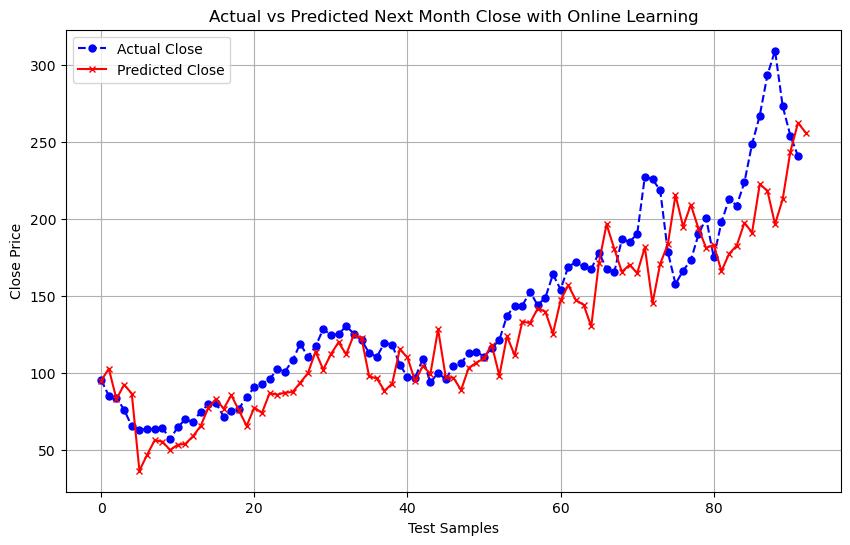

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Assuming the data has been preprocessed and is available in monthly_df
# Sort by Date
monthly_df.sort_values('Date', ascending=True, inplace=True)

# Feature columns: All columns except for 'Next_Month_Close'
features = monthly_df.drop(columns=['Next_Month_Close']).values

# Normalize the features (LSTM models typically perform better with scaled data)
scaler = MinMaxScaler(feature_range=(0, 1))
features_scaled = scaler.fit_transform(features)

# Target column: 'Next_Month_Close'
target = monthly_df['Next_Month_Close'].values
target_scaler = MinMaxScaler(feature_range=(0, 1))  # Create a separate scaler for the target
target_scaled = target_scaler.fit_transform(target.reshape(-1, 1))

# Function to create sequences
def create_sequences(data, target_scaled, n_steps):
    X, y = [], []
    for i in range(len(data) - n_steps):
        X.append(data[i:i + n_steps])
        y.append(target_scaled[i + n_steps])
    return np.array(X), np.array(y)

# Use the last 6 months as input (n_steps=6)
n_steps = 6
X, y = create_sequences(features_scaled, target_scaled, n_steps)

# Reshape input to be 3D: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], X.shape[2])

# Split the data into training and test sets (80% training, 20% testing)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
def build_model():
    model = Sequential()
    model.add(LSTM(300, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
    model.add(Dropout(0.5))
    model.add(LSTM(200, activation='relu', return_sequences=False))
    model.add(Dropout(0.5))
    model.add(Dense(100, kernel_initializer='uniform',activation='relu'))  # Output layer for the next month's close price
    model.add(Dense(1,kernel_initializer='uniform', activation='relu'))
    model.compile(optimizer=Adam(), loss='mean_squared_error')
    return model

# Initialize the model
model = build_model()

# Train the initial model on the first 80% of the data
model.fit(X_train, y_train, epochs=300, batch_size=32, verbose=2)

# Initialize lists to store predictions and actual values for plotting
predictions = []
actual_values = []

print("*"*len(X_test))
# Now, for online learning, retrain and predict incrementally
for i in range(1,len(X_test)):
    print("*", end='')
    # Train on the data up to the current point
    X_train_updated = np.concatenate((X_train, X_test[:i]), axis=0)
    y_train_updated = np.concatenate((y_train, y_test[:i]), axis=0)
    
    # # Rebuild the model to avoid weights from being mixed up
    # model = build_model()
    
    # Retrain the model with the updated data
    model.fit(X_train_updated, y_train_updated, epochs=3, batch_size=32, verbose=0)  # Reduced epochs for quick updates

    # Predict the next point (test on the next point)
    prediction = model.predict(X_test[i:i+1], verbose=0)
    predictions.append(prediction[0][0])

    # Store actual value for comparison
    actual_values.append(y_test[i][0])

# Inverse transform the predicted and actual values to get them back to the original scale
predictions = target_scaler.inverse_transform(np.array(predictions).reshape(-1, 1))
actual_values = target_scaler.inverse_transform(np.array(actual_values).reshape(-1, 1))

# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Close', color='blue', linestyle='--', marker='o', markersize=5)
plt.plot(predictions, label='Predicted Close', color='red', linestyle='-', marker='x', markersize=5)
plt.title('Actual vs Predicted Next Month Close with Online Learning')
plt.xlabel('Test Samples')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [46]:
capital = 10000
num_shares = 0

sold = []
bought = []
for i in range(1,len(predictions)):
    if actual_values[i-1] > predictions[i]:
        if num_shares>0:
            sold.append(i)
            print(f"Sold at {actual_values[i-1]}")
            capital += (num_shares*actual_values[i-1])[0]
            num_shares = 0
    else:
        num_shares_to_buy = capital//actual_values[i-1]
        if num_shares_to_buy>0:
            bought.append(i)
            print(f"Bought at {actual_values[i-1]}")
            num_shares +=num_shares_to_buy
            capital -= (num_shares_to_buy*actual_values[i-1])[0]

(capital + num_shares*actual_values[-2])[0]

Bought at [95.30000305]
Sold at [85.04571533]
Bought at [83.61142731]
Sold at [65.06999969]
Bought at [74.67142487]
Sold at [80.14571381]
Bought at [71.51428223]
Sold at [76.67713928]
Bought at [110.37999725]
Sold at [117.16000366]
Bought at [105.26000214]
Sold at [97.33999634]
Bought at [96.69000244]
Sold at [108.98999786]
Bought at [93.73999786]
Sold at [99.86000061]
Bought at [95.59999847]
Sold at [104.20999908]
Bought at [110.51999664]
Sold at [115.81999969]
Bought at [121.34999847]
Sold at [136.99000549]
Bought at [154.11999512]
Sold at [169.03999329]
Bought at [167.42999268]
Sold at [186.86999512]
Bought at [178.58000183]
Sold at [189.94999695]
Bought at [254.28999329]


14967.019889831545

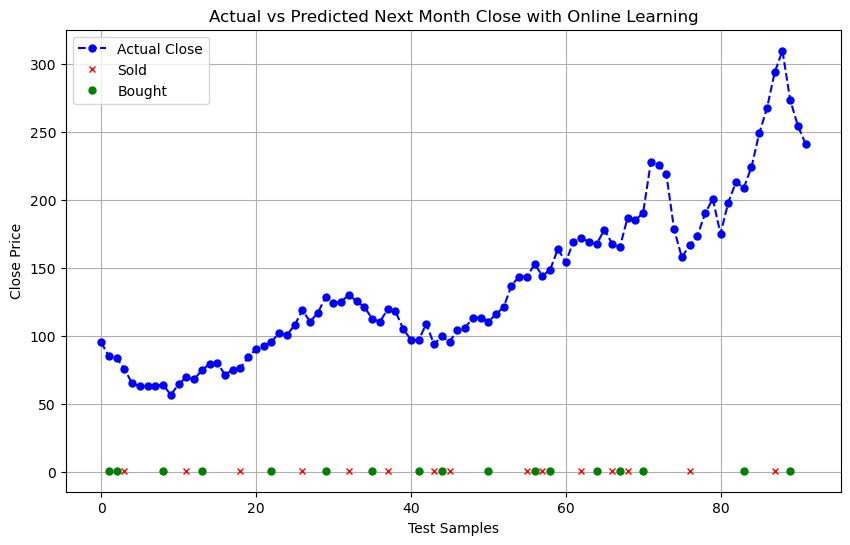

In [36]:
# Plot the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.plot(actual_values, label='Actual Close', color='blue', linestyle='--', marker='o', markersize=5)
plt.plot(sold, [1 for _ in range(len(sold))], label='Sold', color='red', linestyle='', marker='x', markersize=5)
plt.plot(bought, [1 for _ in range(len(bought))], label='Bought', color='green', linestyle='', marker='o', markersize=5)
plt.title('Actual vs Predicted Next Month Close with Online Learning')
plt.xlabel('Test Samples')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
capital = 10000

leftover_cash = capital%actual_values[0][0]
num_shares = capital//actual_values[0][0]

print(f"Final capital: {leftover_cash+num_shares*actual_values[-2][0]}")

Final capital: 25143.440063476562
